# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

import sys
!{sys.executable} -m pip install xgboost

In [138]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 101)
from scipy.stats import uniform, randint
from datetime import datetime

# preprocess lib
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder

# model
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV

# visual lib
from sklearn.decomposition import PCA
import seaborn as sns

# close warning
import warnings
warnings.filterwarnings('ignore')

## Data Description

Column | Description
:---|:---------
`title` |Title of the movie|
`country` | Countries in which movie was released|
`genres` | Movie Genres (Action ,Adventure, Comedy etc.)
`language` | Languages in which movie was released
`writer_count` | Number of writers of the movie
`title_adaption` | Is movie original screenplay or adapted.
`censor_rating` | Release rating given to the movie (R /PG-13/PG/NR/UR/G)
`release_date` | Date when movie was released
`runtime` | Movie runtime
`dvd_release_date` | Date of release of DVD for sale
`users_votes` | Number of users who voted for this movie to be included in Watch-It library
`comments` | Number of comments on movie trailer(as of now)
`likes` | Number of likes on movie trailer (as of now)
`overall_views` | Number of views on movie trailer (as of now)
`dislikes` | Number of dislikes on movie trailer (as of now)
`ratings_imdb` | Rating given to movie on IMDB.
`ratings_tomatoes` | Rating given to movie on Rotten tomatoes.
`ratings_metacritic` | Rating given to movie on Metacritic etc.
`special_award` | Number of awards nominations/winnings in BAFTA, Oscar or  Golden Globe.
`awards_win` | awards won by the movie
`awards_nomination` | Number of awards nominations
`revenue_category` | Revenue Category (High/Low)

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [143]:
data.shape

(2400, 22)

In [144]:
data.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,users_votes,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Pooh's Heffalump Movie,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,11-Feb-05,68 min,24-May-05,"5,654",NaN,NaN,NaN,NaN,6.4/10,80%,64/100,0,0,1,High
1,Yeh Jawaani Hai Deewani,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,31-May-13,160 min,15-Jul-13,"33,860",9.0,124.0,127528.0,12.0,7.1/10,67%,0,0,22,92,Low
2,Tae Guk Gi: The Brotherhood of War,South Korea,"Action, Drama, War",Korean,4.0,False,R,24-Sep-04,140 min,15-Feb-05,"35,697",268.0,614.0,351123.0,18.0,8.1/10,80%,64/100,0,12,7,Low
3,"Book of Eli, The",USA,"Action, Adventure, Drama, Thriller",English,1.0,False,R,15-Jan-10,118 min,15-Jun-10,"2,71,524",NaN,NaN,NaN,NaN,6.9/10,47%,53/100,0,3,16,High
4,Blind Dating,USA,"Comedy, Romance",English,1.0,False,PG-13,26-Apr-07,95 min,05-Feb-08,"11,251",116.0,693.0,970306.0,36.0,6.1/10,25%,0,0,0,0,Low


In [5]:
#Explore columns
data.columns

Index(['title', 'country', 'genres', 'language', 'writer_count',
       'title_adaption', 'censor_rating', 'release_date', 'runtime',
       'dvd_release_date', 'users_votes', 'comments', 'likes', 'overall_views',
       'dislikes', 'ratings_imdb', 'ratings_tomatoes', 'ratings_metacritic',
       'special_award', 'awards_win', 'awards_nomination', 'revenue_category'],
      dtype='object')

In [6]:
#Description
data.describe()

,writer_count,comments,likes,overall_views,dislikes,special_award,awards_win,awards_nomination
count,2306.000000,1974.000000,1956.000000,2.083000e+03,1956.000000,2400.000000,2400.000000,2400.000000
mean,2.596271,546.438197,3113.894172,1.345472e+06,232.665644,0.185417,6.582917,12.698333
std,2.011586,2103.833164,10213.600411,4.030918e+06,946.288417,0.388716,16.089857,24.925965
min,1.000000,0.000000,0.000000,2.100000e+01,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,99.000000,6.752950e+04,7.000000,0.000000,0.000000,1.000000
50%,2.000000,57.000000,425.000000,2.816520e+05,30.000000,0.000000,2.000000,5.000000
75%,3.000000,289.000000,1819.000000,9.855095e+05,121.250000,0.000000,6.000000,12.000000
max,28.000000,44644.000000,188526.000000,1.071502e+08,29267.000000,1.000000,235.000000,326.000000


##### 13 numercal_features_only 

In [22]:
def numerical_data_preprocessing(df):
    # preprocessing
    df['users_votes'] = [''.join(x.split(',')) for x in df['users_votes'].tolist()]
    df['runtime'] = [x.split(' ')[0] for x in df['users_votes'].tolist()]
    df['ratings_imdb'] = [''.join(x.split('/')[0].split('.')) for x in df['ratings_imdb'].tolist()]
    df['ratings_tomatoes'] = [x.split('%')[0] for x in df['ratings_tomatoes'].tolist()]
    df['ratings_metacritic'] = [x.split('/')[0] for x in df['ratings_metacritic'].tolist()]
    
    # replace nan with mean
    df = df.fillna(numerical_data.mean())

    # to int
    df = df.astype(int)
    
    # normalization
    df = df.apply(zscore)
    return df

In [139]:
numerical_rows = ['writer_count', 'runtime', 'users_votes', 'comments', 'likes', 'overall_views', 'dislikes', 'ratings_imdb', 'ratings_tomatoes', 'ratings_metacritic', 'special_award', 'awards_win', 'awards_nomination']
numerical_data = data[numerical_rows]
numerical_label = data[['revenue_category']]

# preprocessing
## data
numerical_data = numerical_data_preprocessing(numerical_data)

## label
revenue_category_list=[]
for element in numerical_label['revenue_category']:
    if element=='High':
        revenue_category_list.append(1)
    elif element=='Low':
        revenue_category_list.append(0)
    else:
        revenue_category_list.append(-1)
numerical_label['revenue_category'] = revenue_category_list

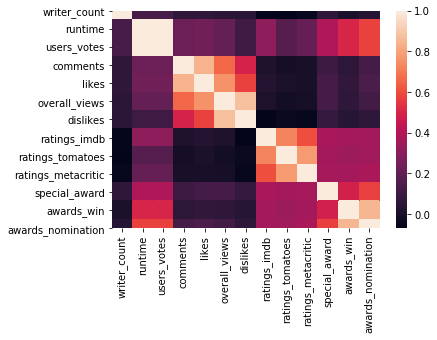

In [9]:
sns.heatmap(numerical_data.corr())

##### data visualize

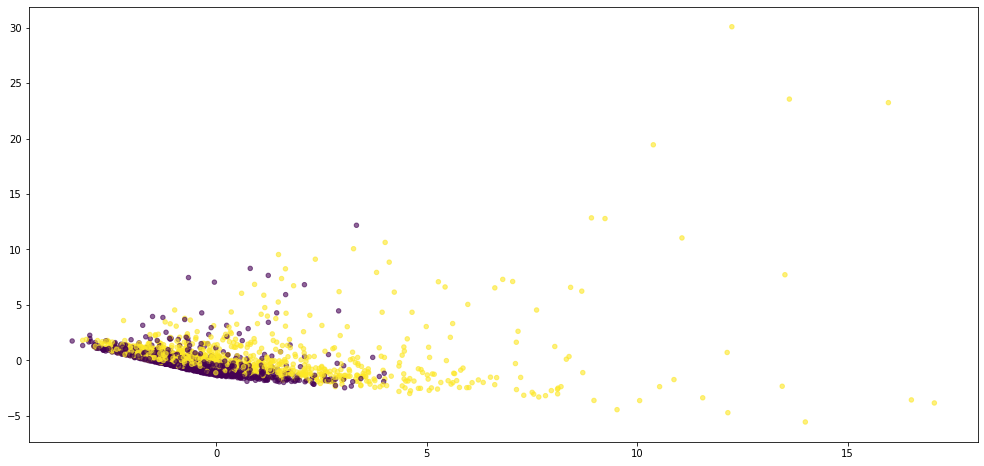

In [147]:
pca=PCA(n_components=2)
pca.fit(numerical_data)
pca_result = pca.transform(numerical_data)
plt.scatter(pca_result[:,0], pca_result[:,1], c=numerical_label['revenue_category'], s=20, alpha=0.6, marker='o')

<BarContainer object of 13 artists>

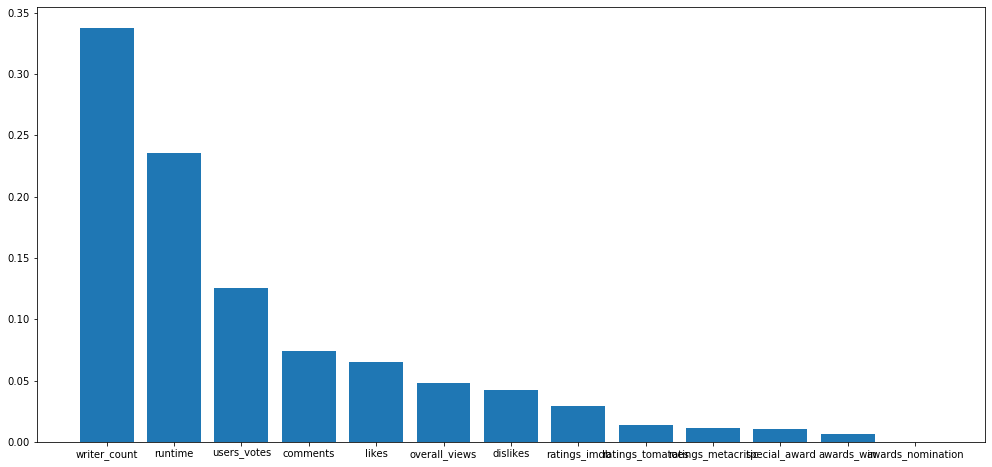

In [11]:
pca=PCA()
pca.fit(numerical_data)
pca_result = pca.transform(numerical_data)
plt.rcParams["figure.figsize"]=(17,8)
x=numerical_data.columns
y=pca.explained_variance_ratio_
plt.bar(x,y)

##### 13 numercal_features_only + 2 date_features + 5 category_features (on going)

In [116]:
def date_to_timestamp(df):
    data = df.tolist()
    return_list = []
    month_dic={'Jan':1, 'Feb':2, 'Mar':3,'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    for date in df:
        if str(date) != 'nan':
            day, month, year = date.split('-')
            year = "20"+year
            return_list.append(datetime(int(year),int(month_dic[month]),int(day)).timestamp())
        else:
            return_list.append(np.nan)
    return return_list
        

In [131]:
def date_data_preprocessing(df): 
    df['release_date'] = date_to_timestamp(df['release_date'])
    df['dvd_release_date'] = date_to_timestamp(df['dvd_release_date'])
    
    # normalization
    df_tmp = df[['release_date', 'dvd_release_date']]
    df_tmp = df_tmp.apply(zscore)
    df['release_date'] = df_tmp['release_date']
    df['dvd_release_date'] = df_tmp['dvd_release_date']
    return df

In [ ]:
def category_data_preprocessing(df):
    # category_features = country, genres, language, title_adaption, censor_rating
    censor_rating = np.array(['nan' if x is np.nan else x for x in df['censor_rating'].values])

    ohe_title_adaption = OneHotEncoder().fit_transform(df['title_adaption'].values.reshape(-1,1)).toarray()
    ohe_censor_rating = OneHotEncoder().fit_transform(censor_rating.reshape(-1,1)).toarray()

    censor_columns = [f'censor_columns{x}' for x in range(ohe_censor_rating.shape[1])]

    df_title_adaption= pd.DataFrame(ohe_title_adaption, columns={'title_adaption_0', 'title_adaption_1'})
    df_ohe_censor_rating= pd.DataFrame(ohe_censor_rating, columns=[censor_columns])

    twentyf_data = twentyf_data.merge(df_title_adaption, left_index=True, right_index=True)
    twentyf_data = twentyf_data.merge(df_ohe_censor_rating, left_index=True, right_index=True)
    return df

In [137]:
# twentyf_data = data.copy()

# numerical features
# twentyf_data = numerical_data_preprocessing(twentyf_data)

# date_features
# twentyf_data = date_data_preprocessing(twentyf_data)

# category_features:
# twentyf_data = category_data_preprocessing(twentyf_data)


## Visualization, Modeling, Machine Learning

Can you build a model that can help them predict what titles would be suitable for licensing and identify how different features influence their decision? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

util

In [48]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [13]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean train score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_train_score'][candidate],
                  results['std_train_score'][candidate]))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## xgboost_numerical_features

##### hyperparameter searching

In [149]:
xgb_model= xgb.XGBClassifier(objective="binary:logistic", random_state=5)

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=5, n_iter=10, cv=10, verbose=1, n_jobs=1, return_train_score=True)
search.fit(numerical_data, numerical_label)

report_best_scores(search.cv_results_, 3)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model with rank: 1
Mean train score: 0.898 (std: 0.004)
Mean validation score: 0.857 (std: 0.028)
Parameters: {'colsample_bytree': 0.8799787589874962, 'gamma': 0.13290955876775362, 'learning_rate': 0.11540576419240914, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9333970968251356}

Model with rank: 2
Mean train score: 0.917 (std: 0.002)
Mean validation score: 0.856 (std: 0.030)
Parameters: {'colsample_bytree': 0.7822259385976673, 'gamma': 0.20711750954052566, 'learning_rate': 0.11882397982009439, 'max_depth': 3, 'n_estimators': 142, 'subsample': 0.831935124075818}

Model with rank: 3
Mean train score: 0.961 (std: 0.002)
Mean validation score: 0.855 (std: 0.026)
Parameters: {'colsample_bytree': 0.967723305148511, 'gamma': 0.47900675223741873, 'learning_rate': 0.19840113616040359, 'max_depth': 4, 'n_estimators': 104, 'subsample': 0.9983955652246075}



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.5s finished


##### train with selected hyper

In [15]:
xgb_numerical_features_model= xgb.XGBClassifier(objective="binary:logistic", 
                             random_state=5, 
                             colsample_bytree=0.8799787589874962,
                             gamma= 0.13290955876775362, 
                             learning_rate= 0.11540576419240914,
                             max_depth= 3,
                             n_estimators= 100,
                             subsample= 0.9333970968251356,
                             eval_metric=["auc", "error"])
x_train, x_test, y_train, y_test = train_test_split(numerical_data, numerical_label, random_state=5)
xgb_numerical_features_model.fit(x_train, y_train, eval_set=[(x_test, y_test)])
y_pred = xgb_numerical_features_model.predict(x_test)

[0]	validation_0-auc:0.88583	validation_0-error:0.17500
[1]	validation_0-auc:0.89536	validation_0-error:0.15333
[2]	validation_0-auc:0.89558	validation_0-error:0.15167
[3]	validation_0-auc:0.89511	validation_0-error:0.15333
[4]	validation_0-auc:0.89922	validation_0-error:0.15167
[5]	validation_0-auc:0.89963	validation_0-error:0.15500
[6]	validation_0-auc:0.90025	validation_0-error:0.15333
[7]	validation_0-auc:0.89970	validation_0-error:0.15500
[8]	validation_0-auc:0.90021	validation_0-error:0.15667
[9]	validation_0-auc:0.90027	validation_0-error:0.15500
[10]	validation_0-auc:0.89947	validation_0-error:0.15333
[11]	validation_0-auc:0.89852	validation_0-error:0.15333
[12]	validation_0-auc:0.89881	validation_0-error:0.15333
[13]	validation_0-auc:0.89864	validation_0-error:0.15500
[14]	validation_0-auc:0.89879	validation_0-error:0.15667
[15]	validation_0-auc:0.89976	validation_0-error:0.15500
[16]	validation_0-auc:0.89985	validation_0-error:0.15833
[17]	validation_0-auc:0.89997	validation_



**The management wants to know what are the most important features for your model.  Can you tell them?**

> #### Task:
- **Visualize the top 20 features and their feature importance.**



top5 features: runtime, overall_views, rating_tomatoes, rating_imdbm, rating_metacritic

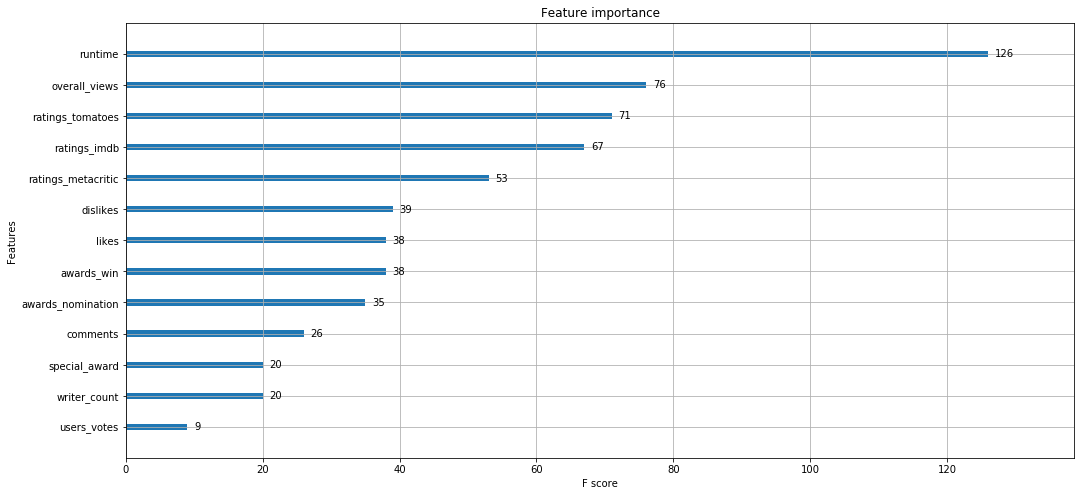

In [16]:
xgb.plot_importance(xgb_numerical_features_model)

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), you must predict the value of the `revenue_category` variable. You should submit a CSV file with a header row and one row per test entry. The file (submissions.csv) should have exactly 2 columns:

The file (`submissions.csv`) should have exactly 2 columns:
   - **title**
   - **revenue_category**

In [17]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,users_votes,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination
0,Delhi-6,India,"Comedy, Drama","Hindi, English",3.0,True,Not Rated,20-Feb-09,141 min,16-Jun-09,"6,337",7.0,43.0,165008.0,13.0,6.0/10,40%,45/100,0,2,7
1,Before I Disappear,"USA, UK",Drama,English,1.0,False,Unrated,28-Nov-14,93 min,19-May-15,"8,370",NaN,NaN,NaN,NaN,7.2/10,38%,47/100,0,16,8
2,"Good Year, A","USA, UK","Comedy, Drama, Romance","English, French, Russian",2.0,True,PG-13,10-Nov-06,117 min,27-Feb-07,"82,062",14.0,276.0,187788.0,17.0,7.0/10,25%,47/100,0,1,2
3,Brüno,"USA, UK",Comedy,"English, German",9.0,True,R,10-Jul-09,81 min,17-Nov-09,"1,33,925",81.0,301.0,200324.0,43.0,5.8/10,67%,54/100,0,2,5
4,How to Lose a Guy in 10 Days,"USA, Germany","Comedy, Romance",English,5.0,True,PG-13,07-Feb-03,116 min,01-Jul-03,"1,90,396",74.0,480.0,740345.0,23.0,6.4/10,42%,45/100,0,1,8


In [148]:
# 13 numercial features model
numerical_test_data = test_data[numerical_rows]
numerical_test_data = numerical_data_preprocessing(numerical_test_data)
numerical_test_label = xgb_numerical_features_model.predict(numerical_test_data)

submission_df = pd.DataFrame(data={'title': test_data['title'], 'revenue_category':numerical_test_label})
submission_df.to_csv('submissions.csv',index=False)

---